# Lei de Benford com Python

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import os
import pandas
import sklearn

from IPython.display import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler


# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos como np.NaN
pandas.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
%matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

# Verificação do local para carga de dados
path = os.environ['PATH']

#if path.startswith('C'):
#   IN_KAGGLE = False
#else:
#   IN_KAGGLE = True
    

# Configuração do número de linhas e colunas a serem apresentadas em listagens
pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)


In [6]:
#if IN_KAGGLE:
#    tips = pd.read_csv('tips.csv')
#    tips = pd.read_csv('../input/tips.csv')
#    if 'Unnamed: 0' in tips.columns:
#        tips.drop(['Unnamed: 0'], inplace=True, axis=1)
#else:
#    tips = sns.load_dataset('tips')
#tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips = pd.read_csv('tips.csv')
if 'Unnamed: 0' in tips.columns:
    tips.drop(['Unnamed: 0'], inplace=True, axis=1)
else:
        tips = sns.load_dataset('tips')
        tips.head()


In [19]:
def benford(valores):
    valores_ = valores.astype(str).str[:1].astype(int)
    hist,bins=np.histogram(valores_,bins=range(1,11,1),density =True)
    n = np.arange(1,10,1)
    benford_ = np.log10(1+1/n)
    
    fig, ax = plt.subplots(figsize = figsize)
    valores.hist(ax=ax, bins=100)
    
    fig, ax = plt.subplots(figsize = figsize)
    indices = np.arange(1,10,1)
    width = 1/4

    ax.bar(indices-width/2, hist, width, color='b', label='Valores')
    ax.bar(indices+width/2, benford_, width, color='r', label='Benford')
    ax.set_xlabel('Números')
    ax.set_ylabel('Proporções')
    ax.axes.set_xticklabels(indices)

    plt.legend()
    plt.show()
    
    resultado = benford_ - hist
    return np.sum(np.abs(resultado))

<IPython.core.display.Javascript object>


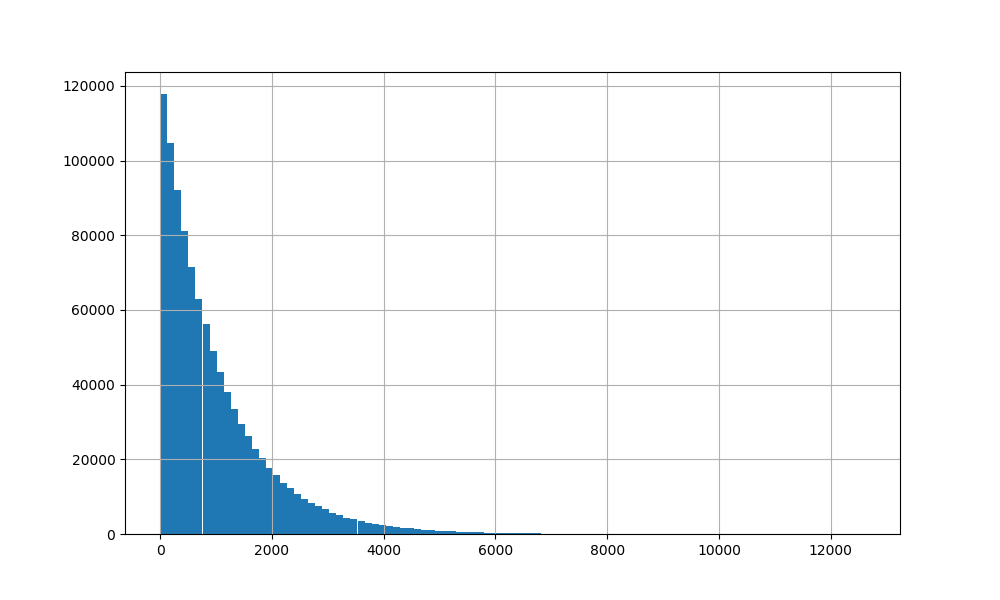

<IPython.core.display.Javascript object>


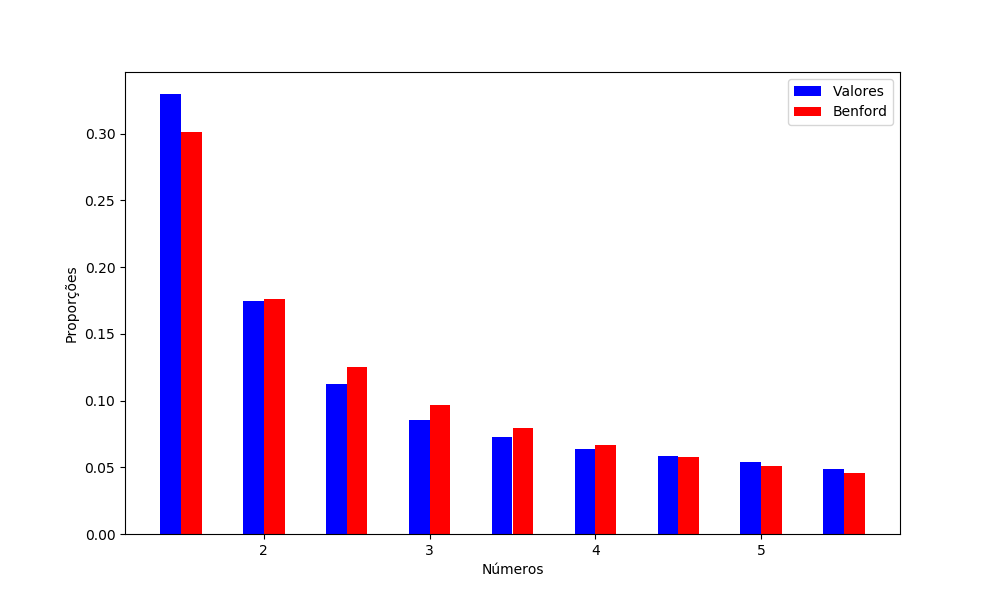

0.06977936484221578


In [20]:
exponencial = pd.Series(np.random.exponential(scale=1000, size=1000000))
xxx = benford(exponencial)
print(xxx)

<IPython.core.display.Javascript object>


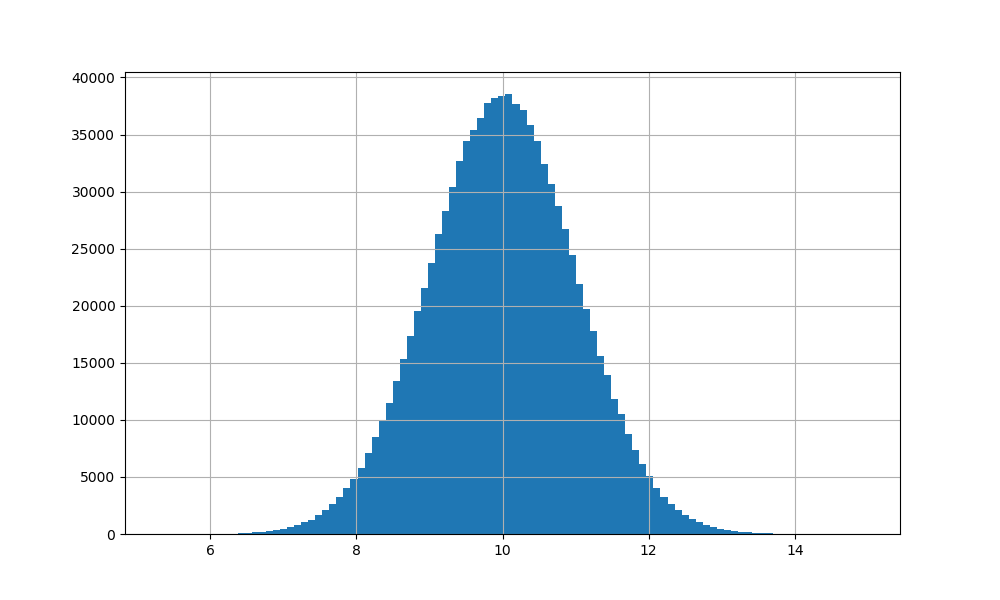

<IPython.core.display.Javascript object>


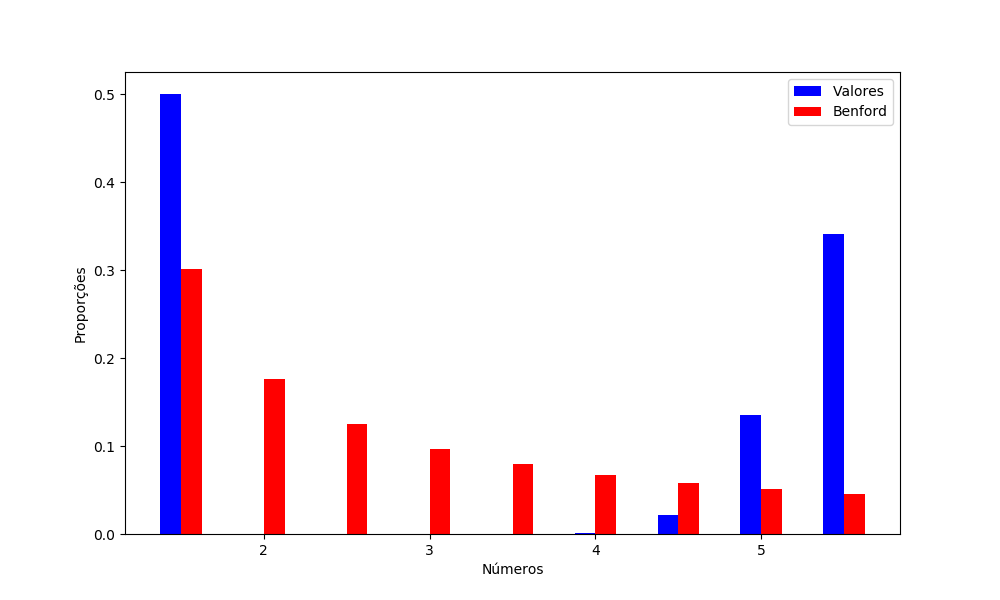

1.1586479826559246


In [21]:
normal = pd.Series(np.random.randn(1000000)+10)
xxx = benford(normal)
print(xxx)

<IPython.core.display.Javascript object>


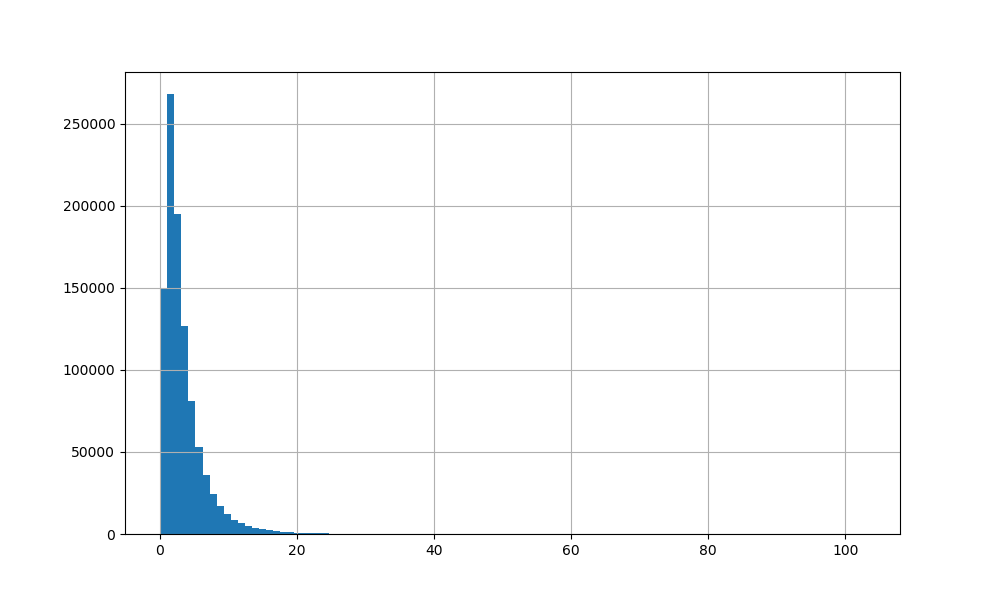

<IPython.core.display.Javascript object>


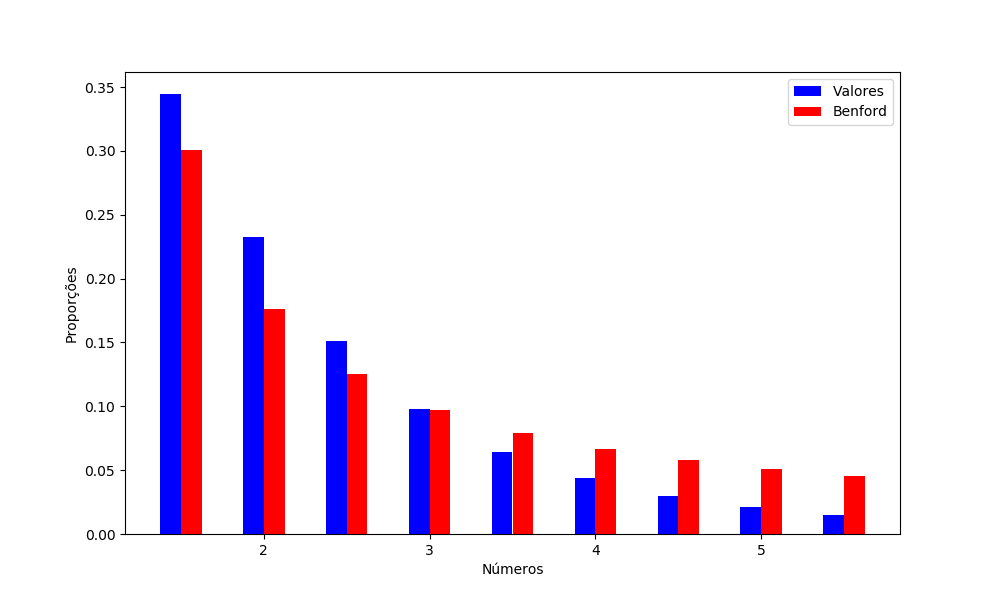

0.25501092968324157


In [22]:
from scipy.stats import gamma
import scipy.stats as stat

alfa = 0.6
beta = 10
s = 0.8
repeticoes = 1000000

rv = stat.lognorm(s=s)
populacao = rv.rvs(size=repeticoes, random_state=1)*2.5

logonormal = pd.Series(populacao)
xxx = benford(logonormal)
print(xxx)

<IPython.core.display.Javascript object>


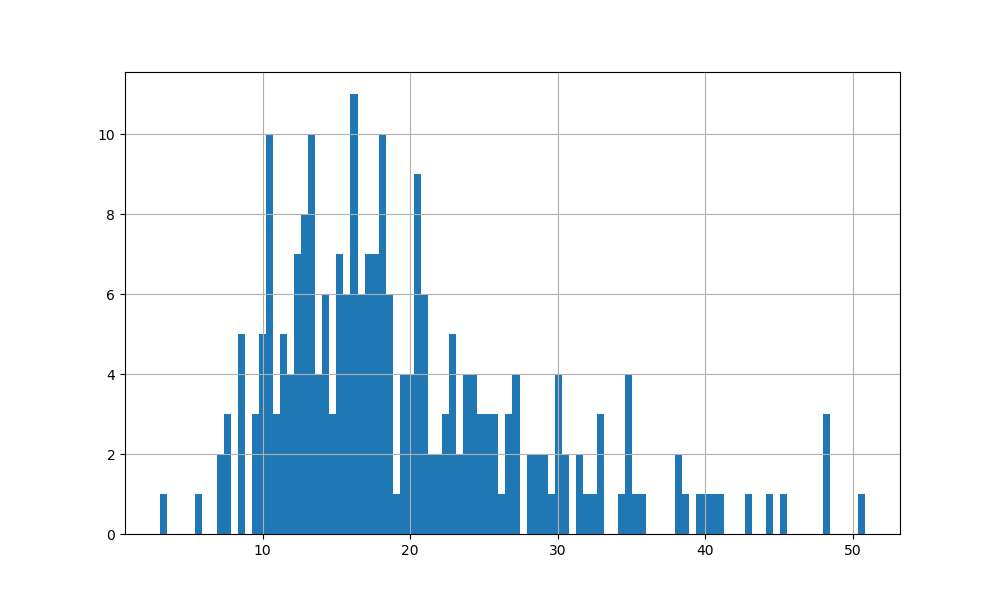

<IPython.core.display.Javascript object>


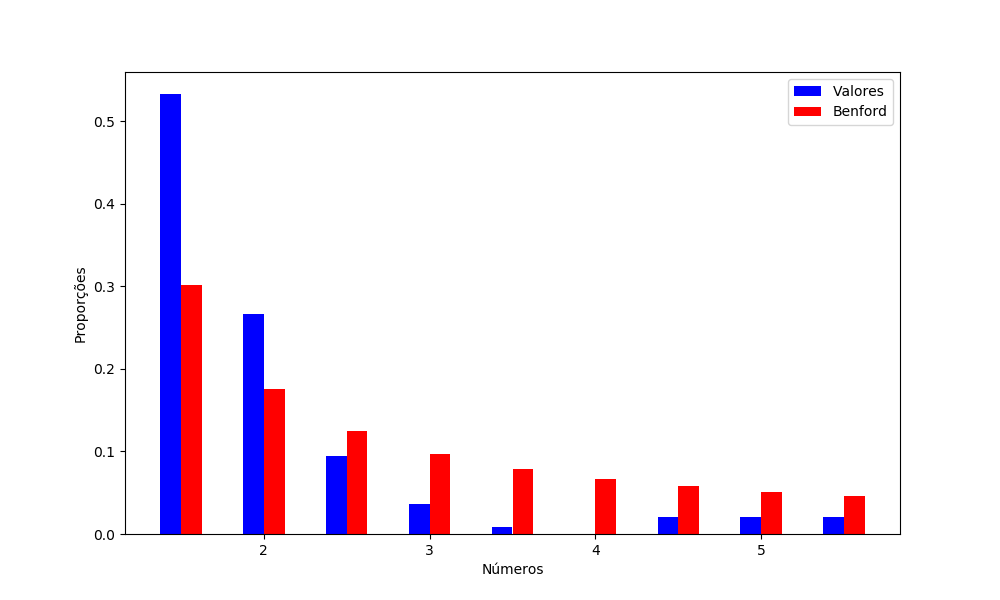

0.6441181462983802


In [23]:
xxx = benford(tips.total_bill)
print(xxx)